# Replication Notebook for "The Effect of Income on Religiousness" by Thomas Busser

Notebook made by Luis Fernando Tamayo Torres 

This notebook will give a brief summary of the paper The Effect of Income on Religiouness, by Thomas Busser. The following paper investigates how income affects religiousness. Using survey's data, the author estimates the effects of income variation over religion activities. It is found that there is a significant effect of income on religiousness.

In [2]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import numpy as np
import pandas as pd
import os
from IPython.display import HTML, display
from tabulate import tabulate

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)



Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In the following website, you can download the data used in this paper: https://www.openicpsr.org/openicpsr/project/116335/version/V1/view?path=/openicpsr/116335/fcr:versions/V1/Data/20140162_Data.dta&type=file

Also, if needed, the research paper can be downloaded from the following website: https://pure.uva.nl/ws/files/2441834/164883_432379.pdf

In [16]:
#Let's upload the data that we are going to use in the investigation.
#This file contains the data collected with the author's survey
busser = pd.read_stata(pathout + '20140162_Data.dta')
#busser = pd.read_stata('https://www.openicpsr.org/openicpsr/project/116335/version/V1/download/terms?path=/openicpsr/116335/fcr:versions/V1/Data/20140162_Data.dta&type=file')
#https://www.openicpsr.org/openicpsr/project/116335/version/V1/download/file?filePath=/openicpsr/116335/fcr:versions/V1/Data/20140162_Data.dta')
#busser.to_stata(pathout + 'busser.dta', write_index=False, version=117)
busser

,ciudad,parroqui,expenditures,j15_1,j15_2,j15_3,j15_4,j15_5,j15_6,j15_7,...,winnersvsalwayslosers,losersvsalwayswinners,group,householdsize,ageresponder,schooling_resp,protestant,attendance,attendpermonth,collect_2
0,guayaquil,tarqui,280.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,3,50,13.0,1.0,never,0.0,1.0
1,guayaquil,tarqui,200.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,5,36,NaN,1.0,every day,30.0,1.0
2,guayaquil,pascuales,290.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,7,33,10.0,1.0,every day,30.0,1.0
3,guayaquil,tarqui,160.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,5,39,12.0,0.0,2 to 3 times a month,2.5,1.0
4,guayaquil,pascuales,200.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,8,52,3.0,0.0,once a week,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,guayaquil,pascuales,600.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,4,58,6.0,0.0,only for special occasions,0.0,1.0
2641,guayaquil,ximena,300.0,no,no,no,no,yes,no,no,...,NaN,1.0,always-winners,5,35,6.0,0.0,only for special occasions,0.0,1.0
2642,guayaquil,pascuales,580.0,no,no,no,no,no,no,no,...,NaN,1.0,always-winners,5,30,12.0,0.0,2 to 3 times a month,2.5,1.0
2643,guayaquil,pascuales,250.0,no,no,no,no,no,no,no,...,1.0,NaN,winners,4,23,11.0,0.0,less than once a month,0.0,1.0


In [17]:
#Thie file contains the data collected by the National Institute of Stadistics and Census of Ecuador.
inec = pd.read_stata(pathout + '20140162_INEC.dta')
inec

,area,ciudad,zona,sector,panelm,vivienda,hogar,p01,p02,p03,...,RE01B,RE01C,RE02,RE03,RE04A,RE04B,RE04C,RE05,fexp,Quintiles
0,Urbana,cuenca,001,006,Panel W6,Vivienda Uno,Hogar Uno,Persona 1,Mujer,76,...,La salud,La religión,Cristiana Católica,7,En momentos de sufrimiento,Cuando necesita una ayuda específica,En momentos de felicidad,Una vez a la semana,136.920802,Quintil 3
1,Urbana,cuenca,001,006,Panel W6,Vivienda Uno,Hogar Uno,Persona 2,Mujer,34,...,La familia,El trabajo,Cristiana Católica,7,Cuando necesita una ayuda específica,Al reflexionar sobre el sentido de la vida,Para agradecer,Una vez al mes,136.920802,Quintil 3
2,Urbana,cuenca,001,006,Panel W6,Vivienda Uno,Hogar Uno,Persona 3,Hombre,35,...,La familia,El trabajo,Cristiana Católica,6,En momentos de sufrimiento,Durante los días de festividades religiosas,Para agradecer,Una vez al mes,136.920802,Quintil 3
3,Urbana,cuenca,001,006,Panel W6,Vivienda Uno,Hogar Uno,Persona 4,Hombre,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.920802,Quintil 3
4,Urbana,cuenca,001,006,Panel W6,Vivienda Dos,Hogar Uno,Persona 1,Hombre,40,...,La salud,El trabajo,Cristiana Católica,7,En momentos de sufrimiento,Cuando ora/reza por otras personas,Para agradecer,Una vez a la semana,136.920802,Quintil 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13206,Urbana,ambato,035,009,Panel Z5,Vivienda Dos,Hogar Uno,Persona 2,Mujer,26,...,El conocimiento / información,La salud,Cristiana Católica,7,En momentos de sufrimiento,Cuando ora/reza por otras personas,Para agradecer,Más de una vez al mes,76.722182,Quintil 3
13207,Urbana,ambato,035,009,Panel Z5,Vivienda Dos,Hogar Uno,Persona 3,Hombre,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.722182,Quintil 3
13208,Urbana,ambato,035,009,Panel Z5,Vivienda Tres,Hogar Uno,Persona 1,Hombre,57,...,La familia,La salud,Cristiana Católica,8,Cuando ora/reza por otras personas,En momentos de sufrimiento,En momentos de felicidad,Una vez a la semana,76.722182,Quintil 5
13209,Urbana,ambato,035,009,Panel Z5,Vivienda Tres,Hogar Uno,Persona 2,Mujer,58,...,La familia,La salud,Cristiana Católica,8,Por costumbre,En momentos de sufrimiento,En momentos de felicidad,Una vez a la semana,76.722182,Quintil 5



## Introduction 

A big percentage of the world's population has religious beliefs. There is evidence that suggests that depending on the beliefs that people have, the way in which they can help a society to develop more efficiently may vary. That hypothesis considers that when peolpe combine their faith with their daily production activities, the economic situation of their context might be ameliorated; however, is it important to keep in mind that, as we all know, correlation does not necessarily imply causality. To study the impact that economy has on religion, the author addressed how the Ecuadorian government gives a monthly economic benefit to the poorest families in the country, with the eligibility for the transfer depending on the household’s score on a wealth index. In Ecuador, 72% percent of its population, which consists of approximately 14 million of people, lives in urban areas. The author found that the families that earn the highest incomes tend to visit the church more frequently than those with lower incomes. Furthermore, these families were found more likely to be part of the Catholic Church or an Evangelical community. Although in the last years many investigators have been interested in how religion can affect economy, and have conducted studies regarding the topic, there is not much information or studies that support this analysis. 
For the author, the main questions to answer with his investigation are:
* Do people become more or less religious as they become richer? 
* Do people change their religion as they become richer? 
* Do people increase or decrease church attendance as they become richer?

Considering the secularization thesis, which predicts that as societies increase their level of development, religion gradually loses its importance (Stark and Bainbridge 1985), economists have used cross-country studies to uncover a negative association between per capita gross domestic product (GDP) and the measurement of religiousness (Barro and McCleary 2003 and McCleary and Barro 2006a, 2006b). The Latin American context is especially interesting for studying the effects of income on religiousness due to the fact that the region has recently experienced a dramatic shift away from Catholicism towards Evangelical denominations (Levine 2009). An interesting example of the relationship between economy and religion in South America is Ecuador, since the government of that country started to provide US$35 to the poorest families in the year 2003, and a survey that was carried out in 2009 evidenced that there had been a big change in the population that received the benefit; the composition and variable weights of the wealth index had changed. Therefore, while some of the households that did not use to receive the benefit in the past suddenly gained it, some previous recipients suddenly lost it. In order to analyze and understand the impact of the social policy in Ecuadorian families, the author uses a discontinuous regression and asks himself how could income affect denomination and church attendance. As a primary hyphothesis, the author suggests that religious participation and church membership are quite elastic with respect to income.

Let's see how Thomas Busser finds new results about this interesting investigation.

## 1. Context and Cash Transfer Program

Empirical evidence suggests that as a country develops, religion loses importance.

Ecuador is a lower middle income country with high poverty levels and considerable inequality. According to the National Institute of Statistics (INEC), 76% of the population describes itselt as Catholic and 10% belongs to a non-Catholic community. Starting in 2003, the Ecuadorian government implemented an allowance called "Bono de Desarrollo Humano" (BDH), intended to give an economic help to the poorer people of the country, defined by a wealth index called SELBEN. The index is based on variables which analyze different characteristics of Ecuadorian families; for instance, it considers the household assets and their access to a water service, toilet and shower. 
In 2009 the distribution of the benefit changed and some of the families that had been receiving US$35 each month for more than 5 years, stopped being beneficiaries of the policy.

In [4]:
deominination=pd.crosstab(busser.denomination, busser.attendance)
deominination

attendance,never,only for special occasions,less than once a month,once a month,2 to 3 times a month,once a week,2 to 3 times a week,4 to 6 times a week,every day
denomination,,,,,,,,,
catholic,100,268,116,294,456,609,90,29,9
non-catholic christian,25,26,19,26,45,93,116,54,48
jewish,1,0,0,0,1,0,0,0,0
atheist/none,53,0,0,0,0,0,0,0,0
other,13,16,3,4,5,36,51,23,16


## 2. Empirical Strategy

Yi = α + δTi + f(s) + Xiβ + λEi + εi. 
Busser included the following variables in his regression discontinuity design, which is an instrumental variables approach:
* Y, which is the outcome variable.
* T, which is a binary indicator for receiving the transfer.
* E, which is a binary indicator for having received the transfer before the change. 
* T, which is instrumented by Z. 
* δ, which gives the causal effect of receiving the cash transfer on the outcome.

The collected data comes from poor and rich households from Guayaquil, Quito and Santo Domingo. Households were divided into four groups: The ones that never stopped receiving the benefit (always winners), the ones that never received the benefit (always losers), the ones that did not used to receive the benefit in the past and started receiving it later (winners) and the ones that stopped receiving the benefit (losers). The households were randomly selected for a survey made by professional interviewers, who were instructed to conduct the interview only to the housewife. This survey was made 2 years after the 2009 shift in the beneficiaries occurred. 
Throughout the data collection period, it was possible to collect data from 2,645 households. 
The author explains that the estimation strategy would only be valid if the respondants did not know in which position of the SELBEN Index their household was. Neither household size, nor the age of the respondant and their years of schooling varied significantly. The implemented startegy here consisted in obtaining significant results and comparing them with the ones in the INEC survey. 

The percentages of the distribution in the data of the four groups are presented below:

In [5]:
groups=busser.group.value_counts(normalize=True) * 100
groups

always-winners    25.482042
winners           25.330813
losers            24.688091
always-losers     24.499055
Name: group, dtype: float64

Number of observations

In [23]:
j = {'Number of observations':pd.Series(['Always winners','Winners','Losers','Always losers']),
   'Observations':pd.Series([674,670,653,648])}
df = pd.DataFrame(j)
print (df)

  Number of observations  Observations
0         Always winners           674
1                Winners           670
2                 Losers           653
3          Always losers           648


In [3]:
z = {'Control variables':pd.Series(['Househols size','Age of responder','Schooling of responder']),
   'Discontinuity at threshold':pd.Series([-0.042,-0.887,0.227])}
df = pd.DataFrame(z)
print (df)

        Control variables  Discontinuity at threshold
0          Househols size                      -0.042
1        Age of responder                      -0.887
2  Schooling of responder                       0.227


## 3. Data

In this section the main focus is to compare the results in the collected data with the national Ecuadorian averages. The author's survey contains information about the answers of the household to these questions:
* Which religion does your family have? 
* How religious is your family (ona scale from 0 to 10)? 
* How often do you attend a religious service? 

Sample Data:

In [6]:
d = {'Religion':pd.Series(['Catholic','Non-Catholic','Jewish','Atheist', 'Other']),
   'Observations':pd.Series([1.971,452,2,53,167]),
   'Percent':pd.Series([74.52,17.09,0.08,2.00,6.31])}
df = pd.DataFrame(d)
print (df)


       Religion  Observations  Percent
0      Catholic         1.971    74.52
1  Non-Catholic       452.000    17.09
2        Jewish         2.000     0.08
3       Atheist        53.000     2.00
4         Other       167.000     6.31


In [7]:
c = {'Service attendance':pd.Series(['Never','Only special occasions','Less than once a month','Once a month', '2 to 3 times a month','once a week','2 to 3 times a week','4 to 6 times a week','every day']),
   'Observations':pd.Series([192,310,138,324,507,738,257,106,73]),
   'Percent':pd.Series([7.26,11.72,5.22,12.25,19.17,27.90,9.72,4.01,2.76])}
df = pd.DataFrame(c)
print (df)


       Service attendance  Observations  Percent
0                   Never           192     7.26
1  Only special occasions           310    11.72
2  Less than once a month           138     5.22
3            Once a month           324    12.25
4    2 to 3 times a month           507    19.17
5             once a week           738    27.90
6     2 to 3 times a week           257     9.72
7     4 to 6 times a week           106     4.01
8               every day            73     2.76


INEC Data

In [8]:
h = {'Religion':pd.Series(['Catholic','Non-Catholic','Jewish','Atheist', 'Other']),
   'Observations':pd.Series([1.971,452,2,53,167]),
   'Percent':pd.Series([76.16,10.04,0.24,6.57,6.98])}
df = pd.DataFrame(h)
print (df)

       Religion  Observations  Percent
0      Catholic         1.971    76.16
1  Non-Catholic       452.000    10.04
2        Jewish         2.000     0.24
3       Atheist        53.000     6.57
4         Other       167.000     6.98


In [9]:
s = {'Service attendance':pd.Series(['Never','Only special occasions','Once a year','Once a month', 'More than once a month','Once a week','More than once a week','4 to 6 times a week','every day']),
   'Observations':pd.Series([192,310,138,324,507,738,257,106,73]),
   'Percent':pd.Series([8.20,14.25,7.63,22.58,7.74,33.51,6.09])}
df = pd.DataFrame(s)
print (df)


       Service attendance  Observations  Percent
0                   Never           192     8.20
1  Only special occasions           310    14.25
2             Once a year           138     7.63
3            Once a month           324    22.58
4  More than once a month           507     7.74
5             Once a week           738    33.51
6   More than once a week           257     6.09
7     4 to 6 times a week           106      NaN
8               every day            73      NaN


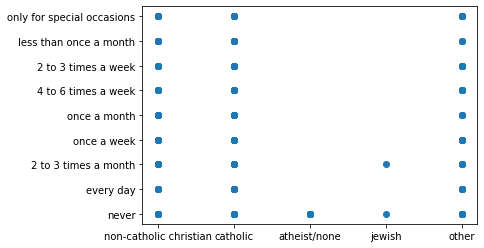

In [10]:
plt.scatter(busser.denomination, busser.attendance)

The author found that in the data he collected, 75% of the households were Catholics, 17% were Evangelicals, 6% belonged to other religions and the remaining 2% were atheists. Additionally, 44% of the households went to the church at least once a week, while 19% went either only for special occasions or never. Last but no least, the average of the question "How religious is yor family?" was 7/10. Comparing these results with the ones from the INEC survey, we can evidence that the outcomes are significantly similar and that their differences are present mainly because the author's survey contained more Catholic people and less atheists than those included in the INEC survey. 

The included households in the author's data had a monthly expenditure of US$297 on average, which means that the allowance that the government gave to them, covers only the 11.8% of families' expenses.

In [5]:
(35*100)/297

11.784511784511784

## 4. Results

This table shows the results obtained from the Sample data, comparing those from Evangelicals with those of the rest of the studied population.

In [11]:
t = {'Church attendance by denomination-percentages':pd.Series(['Never','Only special occasions','Once a year','Once a month', 'More than once a month','Once a week','More than once a week','4 to 6 times a week','Every day','Attendance per month']),
   'Evangelical':pd.Series([5.53,5.75,5.20,5.75,9.96,20.58,25.66,11.95,10.62,9.27]),
   'Rest':pd.Series([7.62,12.95,5.43,13.59,21.07,29.41,6.43,2.37,1.14,3.30])}
df = pd.DataFrame(t)
print (df)

  Church attendance by denomination-percentages  Evangelical   Rest
0                                         Never         5.53   7.62
1                        Only special occasions         5.75  12.95
2                                   Once a year         5.20   5.43
3                                  Once a month         5.75  13.59
4                        More than once a month         9.96  21.07
5                                   Once a week        20.58  29.41
6                         More than once a week        25.66   6.43
7                           4 to 6 times a week        11.95   2.37
8                                     Every day        10.62   1.14
9                          Attendance per month         9.27   3.30


This table contains the results of the INEC data.

In [12]:
b = {'Church attendance by denomination-percentages':pd.Series(['Never','Only special occasions','Once a year','Once a month', 'More than once a month','Once a week','More than once a week','4 to 6 times a week','every day']),
   'Observations':pd.Series([1.02,5.19,3.05,9.98,4.99,41.45,34.32]),
   'Percent':pd.Series([9.03,15.21,8.24,24.04,8.13,32.57,2.78])}
df = pd.DataFrame(b)
print (df)

  Church attendance by denomination-percentages  Observations  Percent
0                                         Never          1.02     9.03
1                        Only special occasions          5.19    15.21
2                                   Once a year          3.05     8.24
3                                  Once a month          9.98    24.04
4                        More than once a month          4.99     8.13
5                                   Once a week         41.45    32.57
6                         More than once a week         34.32     2.78
7                           4 to 6 times a week           NaN      NaN
8                                     every day           NaN      NaN


In [13]:
r = {'Results':pd.Series(['Church attendance','Being evangelical','Self rated religiousness']),
   '(1)':pd.Series([1.727,0.066,0.270]), 
   '(2)':pd.Series([1.722,0.064,0.256]),
   '(3)':pd.Series([1.524,0.034,0.313]),
   '(4)':pd.Series([1.872,0.071,0.278]),
   '(5)':pd.Series([1.863,0.069,0.267]),
   '(6)':pd.Series([1.634,0.037,0.350]),
   'Observations':pd.Series([2.645,2.645,2.645])}
df = pd.DataFrame(r)
print (df)

                    Results    (1)    (2)    (3)    (4)    (5)    (6)  \
0         Church attendance  1.727  1.722  1.524  1.872  1.863  1.634   
1         Being evangelical  0.066  0.064  0.034  0.071  0.069  0.037   
2  Self rated religiousness  0.270  0.256  0.313  0.278  0.267  0.350   

   Observations  
0         2.645  
1         2.645  
2         2.645  


As we can see in the regression table above, the households that received the benefit from the government are 6.5% more likely to be Evengilicals than those who did were beneficiaries. A very interesting result that the author remarks is that the church attendance grew 1.7 times in families that received the extra US$35. That observation leads us think that having extra income increases people's motivation to go to church. Additionally, the author shows that the average Evangelical family attends the church 9.3 times per month, compared to the 3.3 times found for the rest of the sample. If we assume that joining an Evangelical church increases the monthly attendance by six visits, this leads to 0.065 × 6 = 0.39 additional visits. 

As I stated before, a big percentage of the households in the collected data believed in a particular type or religion, and it is known that believers tend to be more attracted to worshiping activities. The author found robust results showing that an increse in income does not affect the beliefs that people have, but it does impact the way in which people practice their religion. This positive effect shows that in average the ones that received the benefit tended to assist 3 times more to the church. The new benefit increased their perception of the advantages of participating in church activities, which can be interpreted as an increase in their social status. The author concludes the results by saying that money incentives believers to participate more in religious activities, which means that there is an increase in church attendants derived from the extra income. Finally, he affirms that it would be interesting to further address whether higher income makes families more religious or it simply increases their overall participation in social and communal activities.

## 5. Concluding Remarks

* Not much is known about how income affects religiousness at the individual level. 
* Differences in income have a significant effect on the frequency with which families attend church and on the kind of churches that they attend.
* Higher income leads to a higher frequency of religious service attendance and increases the likelihood that a family joins an Evangelical community. 
* Income does not affect the degree in which a person considers him or herself religious. 
* The participation and membership on a church resembles a club membership, since they are expensive in terms of money and time, and had a positive income elasticity for the households in the sample.